# M4 T02 - Preprocesado y visualización:

## Exercici 1

Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" (fes una còpia i executa els comandaments amb el mateix dataset county.txt). Aquest exercici consisteix a observar les diferents possibilitats que ofereixen les diferents llibreries de visualització gràfica.

**NOTA: He hecho este ejercicio, pero como no he tenido que programar nada no he adjuntado nada (no entiendo exactamente qué debería adjuntar)**


## Exercici 2

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

->PRE-PROCESSING-DATA/movies.dat


## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

# Ejercicio 2 - Preprocesado

Para este ejercicio, he seguido las indicaciones que se mostraban en el campus:

- Tengo que quedarme con tres columnas: Película, Año y Género
- Solamente puede haber un género.

In [16]:
import pandas as pd

movies = pd.read_table('movies.dat.txt', encoding = "ISO-8859-1", delimiter="::", 
                       header=None, names=["Indice", "Peli", "Genero"])


C:\Users\rakel\AppData\Local\Temp\ipykernel_12624\1150134830.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table('movies.dat.txt', encoding = "ISO-8859-1", delimiter="::",


A pesar de que aparece un Warning, el fichero carga correctamente. Para ello, indico el tipo de encoding (ya que inicialmente aparecía un error) y el delimitador (en este caso, "::"). Además, indico que no tiene cabezal (header=None) pero le añado unos propios

In [17]:
print(movies.shape[0]) #Número de registros
print(movies.shape[1]) #Número de columnas
movies[:5] #Primeras 5 filas - Permite ver que hemos cargado bien los datos y el tipo de datos que tenemos

3883
3


,Indice,Peli,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Observo que se trata de una base de datos manejable con 3 columnas y casi 3900 registros. Así mismo, observo que hay varios géneros para cada registro, y que el año se incluye dentro de la columna "Peli". Vamos a solucionar eso:

In [21]:
movies['Año'] = movies['Peli'].str.extract(r'\((\d*?)\)')
movies[:25:-1]

,Indice,Peli,Genero,Año
3882,3952,"Contender, The (2000)",Drama|Thriller,2000
3881,3951,Two Family House (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3878,3948,Meet the Parents (2000),Comedy,2000
...,...,...,...,...
30,31,Dangerous Minds (1995),Drama,1995
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama,1995
28,29,"City of Lost Children, The (1995)",Adventure|Sci-Fi,1995
27,28,Persuasion (1995),Romance,1995


En el paso anterior, he creado una nueva columna llamada **año**. Observo que parece funcionar correctamente. Resulta importante indicar que **solamente se extraigan los carácteres en aquellos casos que incluyan números** (indicado mediante \d), ya que algunos títulos de películas pueden incluir texto entre paréntesis.
Guardo aquí un link que me ha sido útil para entender la sintaxis: https://cssbook.net/chapter09.html

Sigo con el proceso. Ahora eliminaré todos los géneros más allá del primero (como no tengo ninguna instrucción más para priorizar, me quedaré tan solo con el primero que aparezca):

In [22]:
movies['Genero']=movies['Genero'].str.split('|', 1).str[0].str.strip()
movies[:5]

,Indice,Peli,Genero,Año
0,1,Toy Story (1995),Animation,1995
1,2,Jumanji (1995),Adventure,1995
2,3,Grumpier Old Men (1995),Comedy,1995
3,4,Waiting to Exhale (1995),Comedy,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


Para ello, he realizado primero un "split" de la string, indicando que la partición debía producirse después de la primera barra. Luego he eliminado todo aquello más allá del primer split.

Finalmente, eliminaré la columna índice:

In [23]:
movies = movies.drop("Indice", axis='columns')
movies[:5]

,Peli,Genero,Año
0,Toy Story (1995),Animation,1995
1,Jumanji (1995),Adventure,1995
2,Grumpier Old Men (1995),Comedy,1995
3,Waiting to Exhale (1995),Comedy,1995
4,Father of the Bride Part II (1995),Comedy,1995


Ya estamos muy cerca! Una última cosa que he hecho (más por tema estético que necesario) es eliminar los parentesis con los años de la columna "Peli"

In [25]:
movies['Peli'] = movies['Peli'].str.replace(r'\((\d*?)\)', "")
movies[:5]

C:\Users\rakel\AppData\Local\Temp\ipykernel_12624\2592073973.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['Peli'] = movies['Peli'].str.replace(r'\((\d*?)\)', "")


,Peli,Genero,Año
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995


Ya está todo el preprocesado listo!!

# Ejercicio 3 - Visualización

A continuación, procedo a proponer algunas visualizaciones sencillas para esta base de datos. La primera cosa que tenemos que hacer es ver un poco los rasgos generales de nuestra base de datos:

In [31]:
movies.info()
print(movies['Año'].value_counts())
print(movies['Genero'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Peli    3883 non-null   object
 1   Genero  3883 non-null   object
 2   Año     3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB
1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: Año, Length: 81, dtype: int64
Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genero, dtype: int64


Vemos varias cosas:
- Hay muchos años, y además está como objeto (ahora lo cambiaré a numérico)
- El número de géneros es bastante manejable para visualizarlo como categoría

Sigo con el procesado: Cambio la columna "Año" a variable numérica

In [36]:
movies['Año'] = movies['Año'].astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Peli    3883 non-null   object
 1   Genero  3883 non-null   object
 2   Año     3883 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 76.0+ KB


Y ahora podemos empezar con las visualizaciones! En un primer lugar, parece buena idea ver qué cantidad de películas tenemos para cada género. 

<AxesSubplot:>

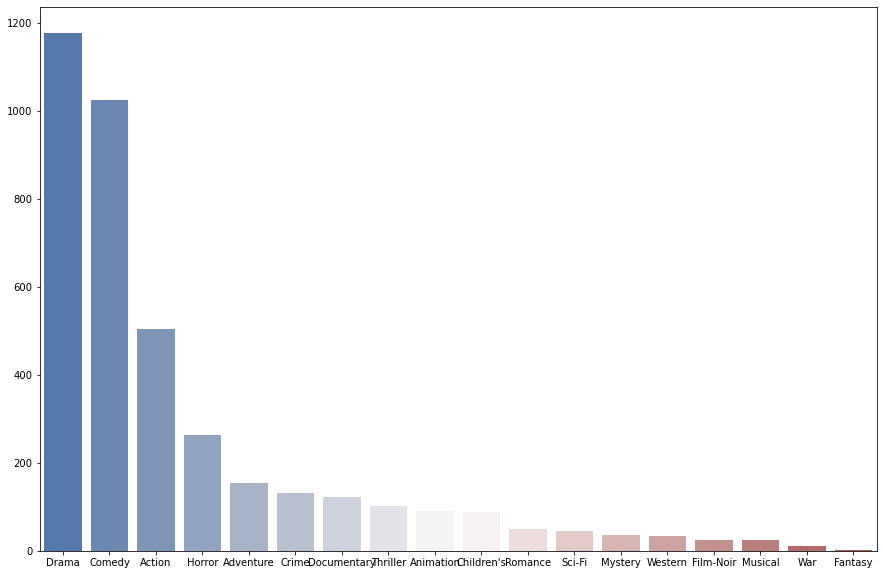

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Geneross = movies['Genero'].value_counts().index
num_porgenero = movies['Genero'].value_counts().values


plt.figure(figsize=(15,10))
sns.barplot(x=Geneross, y=num_porgenero, palette="vlag") #Utilizo Seaborn, ya que me permite usar con facilidad paletas en los bar plots


Podemos observar que la mayor cantidad de películas se ubican en los géneros de Drama y Comedia. Hay que tener en cuenta que he eliminado todos los géneros más allá de la barra: es posible que eso haya dejado de manera prioritaria los géneros más generales. Observamos que las categorías más específicas son muy minoritarias.

Pasamos ahora a ver el número de películas en función de los años:

<AxesSubplot:>

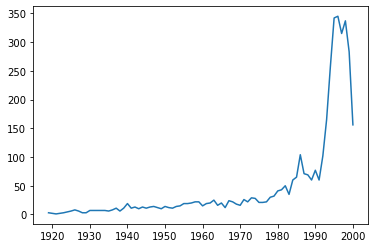

In [43]:
Añoss = movies['Año'].value_counts().index
num_poraños = movies['Año'].value_counts().values

sns.lineplot(x=Añoss, y=num_poraños)

Observamos que se produce un aumento considerable a partir del 1990, para posteriormente reducirse a partir del 2000. Antes de sacar conclusiones, deberíamos saber cómo se ha decidido qué datos se incluían o dejaban de incluir en la base de datos. 